# Breast Cancer Research by Siddharth Bhattacharya
### Cancer Detection

This bit of code is for preparing the model to classify the type of cancer, in case Cancer is detected in the PGM file.

Code and Comments, written and compiled by Siddharth Bhattacharya

In [9]:
# Importing all necessary Libraries.

import tensorflow as tf
import cv2
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
image_size = 256
batch_size = 15
channel = 3
epochs = 5

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Cancer_Detect",
    seed = 50,
    shuffle = True,
    image_size = (image_size,image_size),
    batch_size= batch_size
)

Found 322 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['Cancer', 'Normal']

In [5]:
for image_batch, labels_batch in dataset.take(1):       # take(1) gives you 1 of the batches in the dataset.
    print(image_batch.shape)                                  # Gives us the shape of the data set.
    print(labels_batch.numpy())                               # This shows us whether the data is Malignant or Beningn.
    print(image_batch[0].shape)  

(15, 256, 256, 3)
[1 1 0 1 0 1 1 1 0 0 1 1 0 0 1]
(256, 256, 3)


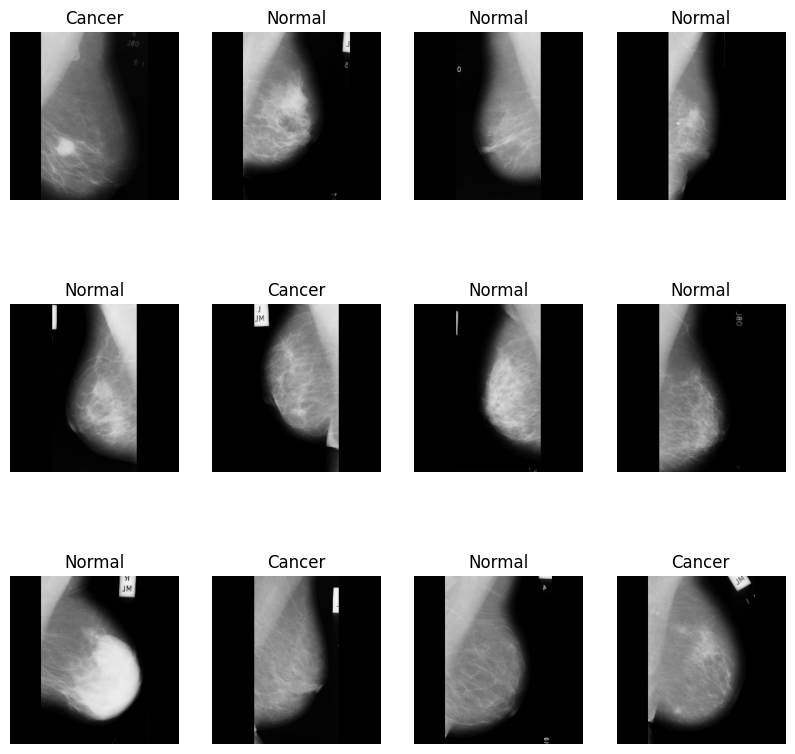

In [7]:
plt.figure(figsize = (10, 10))
for image_batch, labels_batch in dataset.take(2):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("int"))    # Expects 3d array as input and we change the numbers to integer.
        plt.title(class_names[labels_batch[i]])             # Prints the title.
        plt.axis("off")                                     # Hiding the image scale.

In [10]:
len(dataset)

22

In [11]:
train_ds = dataset.take(18)
test_ds = dataset.skip(2)
val_ds = test_ds.take(2)

In [13]:
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(image_size, image_size),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [15]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
input_shape = (batch_size, image_size, image_size, 3) # 3 is the number of channels
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (15, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (15, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (15, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (15, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (15, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (15, 60, 60, 64)         

In [20]:
# Preparing the loss functions and the Optimizer.

from keras.optimizers import SGD
opt = SGD(learning_rate=0.02)                                               # Picking a suitable learning rate of 0.02
model.compile(
    optimizer='adam',                                                    
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose = 1,
    epochs = 50,
)

Epoch 1/50
18/18 [==============================] - 12s 609ms/step - loss: 1.1858 - accuracy: 0.3852 - val_loss: 1.0852 - val_accuracy: 0.3667
Epoch 2/50
18/18 [==============================] - 11s 594ms/step - loss: 1.0659 - accuracy: 0.4185 - val_loss: 1.0896 - val_accuracy: 0.4667
Epoch 3/50
18/18 [==============================] - 11s 598ms/step - loss: 1.0533 - accuracy: 0.4519 - val_loss: 1.0559 - val_accuracy: 0.4333
Epoch 4/50
18/18 [==============================] - 12s 689ms/step - loss: 0.9819 - accuracy: 0.4667 - val_loss: 1.0578 - val_accuracy: 0.5333
Epoch 5/50
18/18 [==============================] - 12s 650ms/step - loss: 0.9673 - accuracy: 0.5111 - val_loss: 1.0762 - val_accuracy: 0.4333
Epoch 6/50
18/18 [==============================] - 15s 815ms/step - loss: 0.9764 - accuracy: 0.5074 - val_loss: 1.0213 - val_accuracy: 0.4000
Epoch 7/50
18/18 [==============================] - 12s 691ms/step - loss: 0.9456 - accuracy: 0.5815 - val_loss: 0.9843 - val_accuracy: 0.5333

In [21]:
# Training the Model with my own stopping algorithm, and storing the history

i = 0
acc = []
val_acc = []
loss = []
val_loss = []
while(1):
    history_type = model.fit(
        train_ds,
        batch_size=batch_size,
        validation_data=val_ds,
        verbose = 1,
        epochs = 1,
    )
    acc.append(history_type.history['accuracy'])
    val_acc.append(history_type.history['val_accuracy'])
    loss.append(history_type.history['loss'])
    val_loss.append(history_type.history['val_loss'])
    print(acc[i],val_acc[i])
    print("Epoch = " +str(i))
    if(val_acc[i][0] >= 0.85 and acc[i][0]>0.95): break
    i=i+1

18/18 [==============================] - 12s 590ms/step - loss: 0.9131 - accuracy: 0.5593 - val_loss: 0.5781 - val_accuracy: 0.7667
[0.5592592358589172] [0.7666666507720947]
Epoch = 0
18/18 [==============================] - 10s 546ms/step - loss: 0.6797 - accuracy: 0.6481 - val_loss: 0.5874 - val_accuracy: 0.7667
[0.6481481194496155] [0.7666666507720947]
Epoch = 1
18/18 [==============================] - 10s 539ms/step - loss: 0.6717 - accuracy: 0.6481 - val_loss: 0.5971 - val_accuracy: 0.7667
[0.6481481194496155] [0.7666666507720947]
Epoch = 2
18/18 [==============================] - 10s 552ms/step - loss: 0.6650 - accuracy: 0.6481 - val_loss: 0.5887 - val_accuracy: 0.7667
[0.6481481194496155] [0.7666666507720947]
Epoch = 3
18/18 [==============================] - 10s 544ms/step - loss: 0.6645 - accuracy: 0.6481 - val_loss: 0.6038 - val_accuracy: 0.7667
[0.6481481194496155] [0.7666666507720947]
Epoch = 4
18/18 [==============================] - 10s 555ms/step - loss: 0.6599 - accurac

KeyboardInterrupt: 

In [20]:
scores = model.evaluate(train_ds)

18/18 [==============================] - 3s 167ms/step - loss: 0.1433 - accuracy: 0.9519


In [1]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [31]:
import numpy as np   
import cv2

image = cv2.imread(r"C:\Users\Siddharth\Desktop\Mammography_DataSet\Classified\Breast_Tissue\Fatty\mdb003.png")
dimensions = (250, 250)
image = cv2.resize(image, dimensions)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

first_image = image.numpy().astype('uint8')
first_label = 1
print(first_label)
print("first image to predict")
plt.imshow(first_image)

temp1, temp2 = predict(model, first_image)
plt.title(f"Predicted: {temp1}.\n Confidence: {temp2}%")

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'